In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
housing.iloc[[0, 1, 2, 3, 4, -1, -2, -3, -4, -5]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND


In [3]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

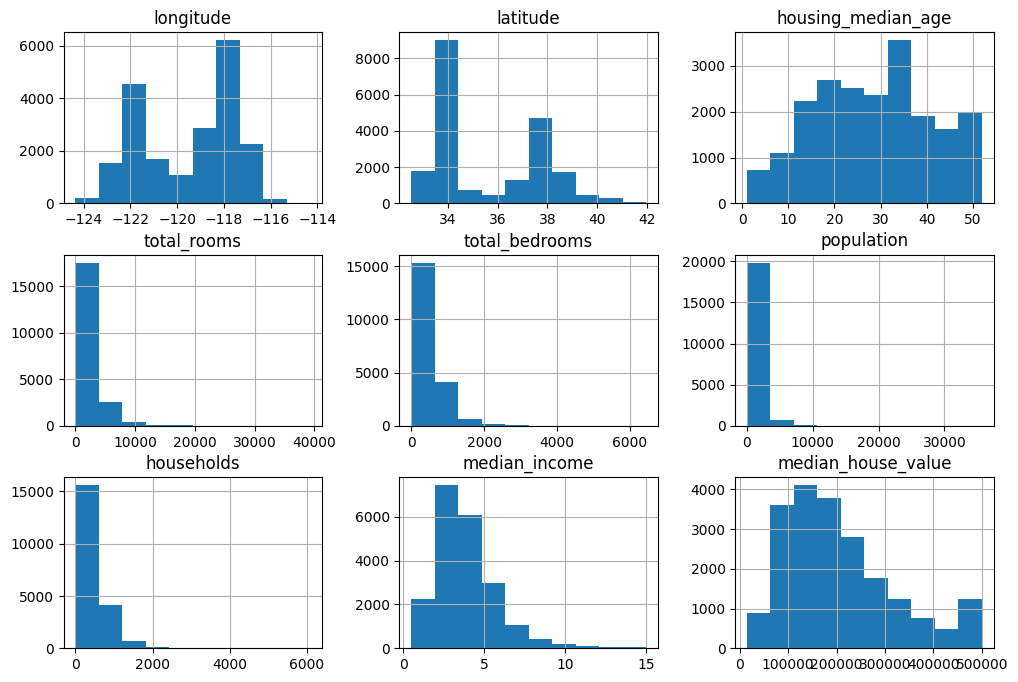

In [5]:
#find illegal values, outliers,
#use visuals to do them, for example boxplots, histograms, barplots
housing.hist(figsize = (12, 8))
plt.show()

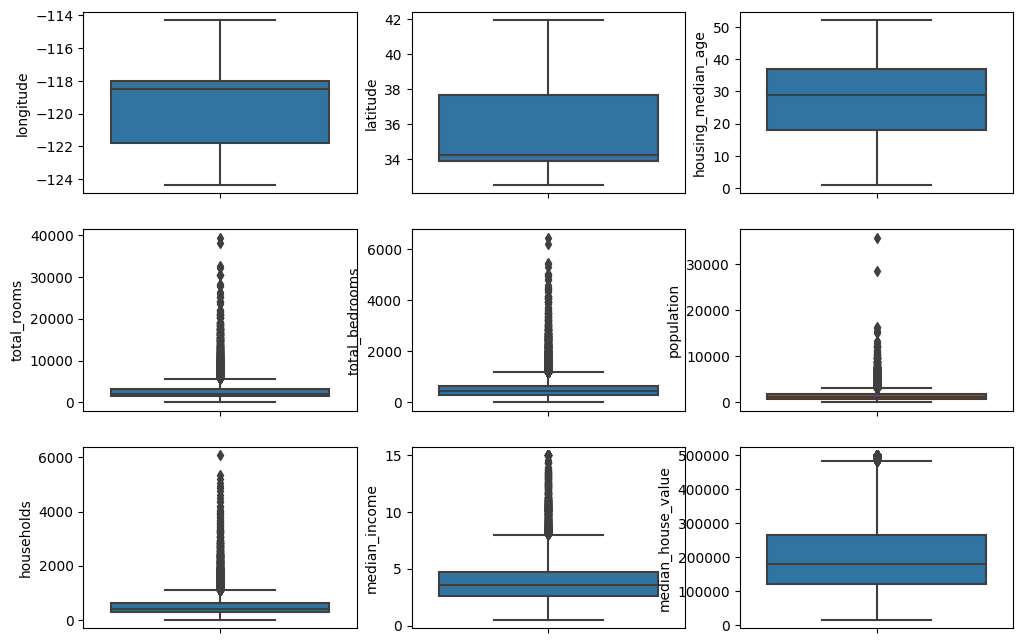

In [6]:
fig = plt.figure(figsize=(12, 8))
cols = list(housing.columns[housing.columns != 'ocean_proximity'])
for i in range(len(cols)):
  ax = plt.subplot(3, 3, i+1)
  sns.boxplot(ax = ax, data = housing, y = cols[i])
plt.show()

In [7]:
#will use stratified sampling strategy to split the dataset into train and test
housing['income_cat'] = pd.cut(housing['median_income'], bins= [0, 1.5, 3, 4.5, 6, np.Inf], labels = [1, 2, 3, 4, 5])

In [8]:
#the train and test size will roughly have this proportion of income category
housing['income_cat'].value_counts() / housing['income_cat'].value_counts().sum()

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [9]:
#use the correlation to fill out missing values
housing.dropna().corrwith(housing['total_bedrooms'][~housing['total_bedrooms'].isna()], numeric_only=True)

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
dtype: float64

In [10]:
housing[['total_bedrooms', 'total_rooms', 'households']].head(n = 10)

,total_bedrooms,total_rooms,households
0,129.0,880.0,126.0
1,1106.0,7099.0,1138.0
2,190.0,1467.0,177.0
3,235.0,1274.0,219.0
4,280.0,1627.0,259.0
5,213.0,919.0,193.0
6,489.0,2535.0,514.0
7,687.0,3104.0,647.0
8,665.0,2555.0,595.0
9,707.0,3549.0,714.0


In [11]:
#missing value treatment using Linear Regression
na_df = housing[['total_bedrooms', 'total_rooms', 'households']]
na_idx = na_df[na_df.isnull().any(axis = 1)].index.tolist()     #indices of na values

na_df_train = na_df[~na_df.index.isin(na_idx)]
na_df_test = na_df.iloc[na_idx]

#use Linear regression
from sklearn.linear_model import LinearRegression
na_lin_reg = LinearRegression()
na_lin_reg.fit(na_df_train[['total_rooms', 'households']], na_df_train['total_bedrooms'])

na_predictions = na_lin_reg.predict(na_df_test[['total_rooms', 'households']])

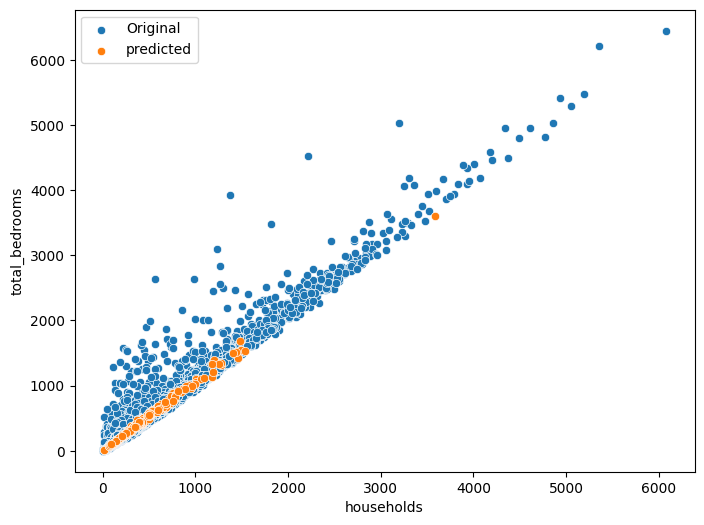

In [12]:
#superimpose the predictions on the scatterplot of total_bedrooms vs households
plt.figure(figsize = (8, 6))
ax = sns.scatterplot(y = 'total_bedrooms', x = 'households', data = na_df_train, label = 'Original')
sns.scatterplot(ax = ax, y = na_predictions, x = na_df_test['households'], label = 'predicted')
plt.show()

In [13]:
#replace the na values specified by na_idx with the predictions
#something is better than nothing; in this case is valid as the
#predicted values are not that uncommon to see
housing['total_bedrooms'][na_idx] = na_predictions
housing.isna().sum()

<ipython-input-13-3eb9c66b1a7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['total_bedrooms'][na_idx] = na_predictions


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [14]:
#now that NAs are taken care of, think feature extraction
#bedrooms per room, bedrooms per household, population per household
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']
housing['population_per_household'] = housing['population'] / housing['households']

#check to if high correlation value came out
housing.corrwith(housing['median_house_value']).sort_values(ascending = False)

<ipython-input-14-bcb977296293>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corrwith(housing['median_house_value']).sort_values(ascending = False)


median_house_value          1.000000
median_income               0.688075
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.050872
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedrooms_per_household     -0.046200
latitude                   -0.144160
bedrooms_per_room          -0.255522
dtype: float64

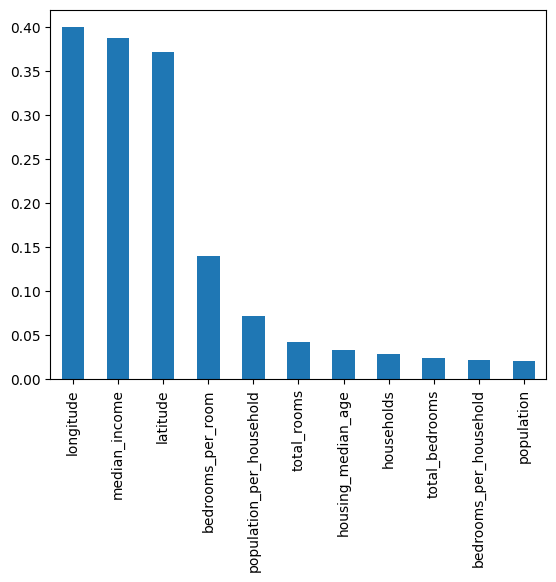

In [15]:
#now might me a good time to employ mutual info regression
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X= housing.loc[:, ~housing.columns.isin(['median_house_value', 'ocean_proximity', 'income_cat'])],
                                   y = housing['median_house_value'])

mi_scores= pd.Series(mi_scores, index = housing.loc[:, ~housing.columns.isin(['median_house_value', 'ocean_proximity', 'income_cat'])].columns)
mi_scores.sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [16]:
#remove the unnecessary columns as infered from mutual regression and correlations
housing.drop(labels = ['bedrooms_per_household', 'population_per_household'], axis = 1, inplace = True)

<Axes: xlabel='longitude', ylabel='latitude'>

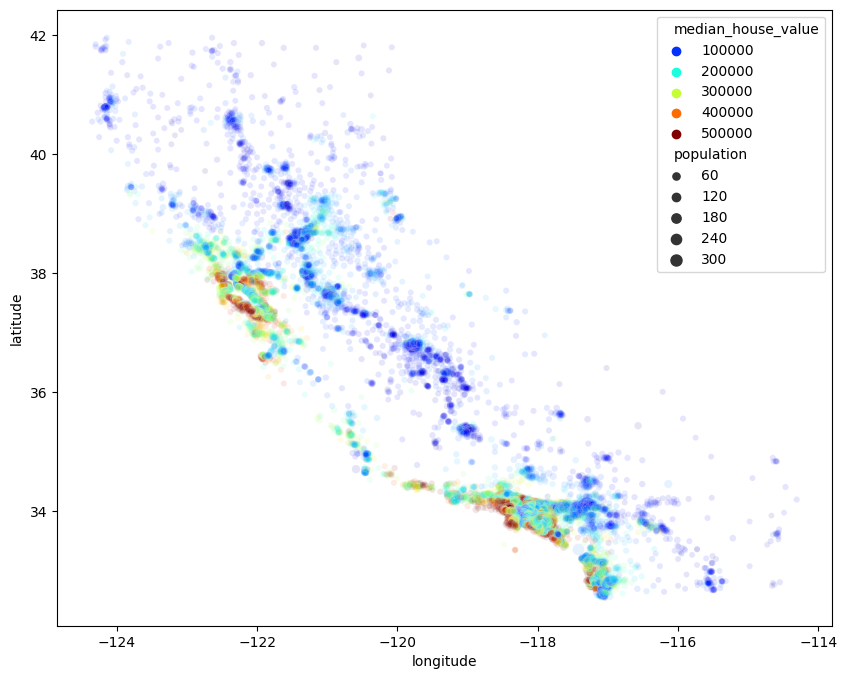

In [17]:
#split the dataset...do some eda may be..move to model building
plt.figure(figsize = (10, 8))
sns.scatterplot(data = housing, x = 'longitude', y = 'latitude', hue= 'median_house_value',
                palette = plt.get_cmap('jet'), size = housing['population']/100, alpha = 0.1)

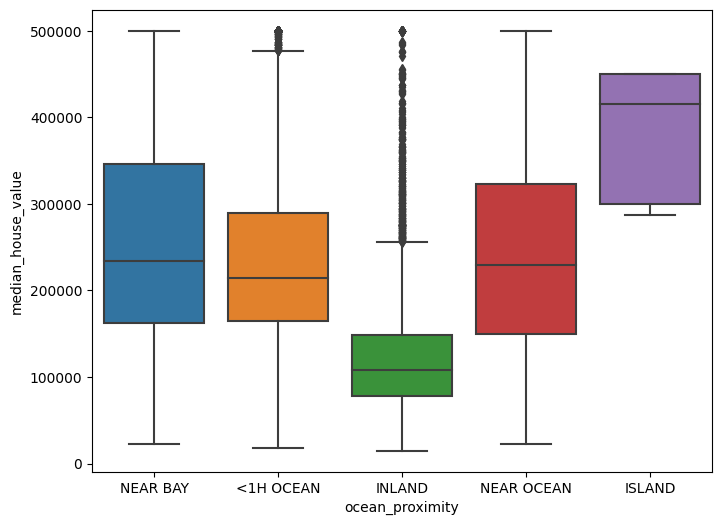

In [18]:
plt.figure(figsize= (8, 6))
sns.boxplot(x = 'ocean_proximity', y = 'median_house_value', data = housing)
plt.show()

In [19]:
housing.head()
#sanity check

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,0.172096


In [20]:
from sklearn.model_selection import train_test_split
target = housing.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(housing, target, test_size = 0.2,
                                                    stratify = housing['income_cat'],
                                                    random_state = 13)

print(x_train.head())
print('\n', x_train['income_cat'].value_counts() / x_train['income_cat'].value_counts().sum())
print('\n', y_train[:5])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3061     -119.29     35.76                15.0       3938.0           789.0   
4123     -118.22     34.14                50.0       3657.0           708.0   
7979     -118.17     33.87                49.0       1937.0           445.0   
20383    -118.95     34.19                24.0       2719.0           434.0   
373      -122.16     37.75                44.0        617.0           131.0   

       population  households  median_income ocean_proximity income_cat  \
3061       3500.0       768.0         2.1295          INLAND          2   
4123       1725.0       644.0         5.5456       <1H OCEAN          4   
7979       1339.0       440.0         3.0319       <1H OCEAN          3   
20383      1318.0       424.0         4.6750       <1H OCEAN          4   
373         378.0       135.0         2.5568        NEAR BAY          2   

       bedrooms_per_room  
3061            0.200356  
4123            0.19

In [21]:
for dfs in (x_train, x_test):
  dfs.drop('income_cat', inplace = True, axis = 1)

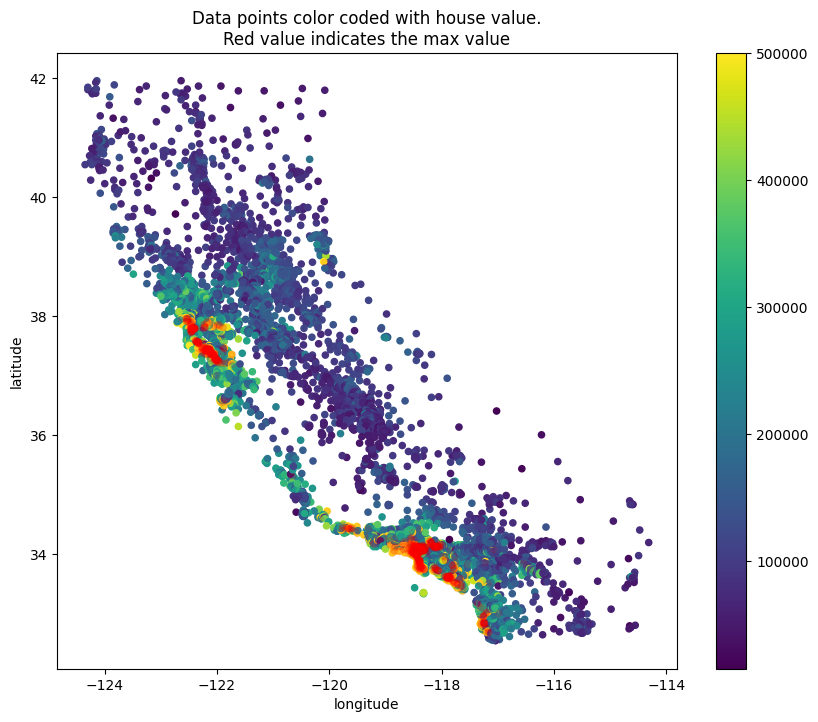

In [22]:
ax = housing.plot(x = 'longitude', y = 'latitude', kind = 'scatter',
             c = target, colorbar = True, figsize = (10, 8))

housing[target == 500001].plot(ax = ax,  x = 'longitude', y = 'latitude',
                               color = 'red', kind = 'scatter', alpha = 0.1)
plt.title('Data points color coded with house value.\nRed value indicates the max value')
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#certain assumptions are made here which will cause problems with test set
#take care of it later.

num_features = list(housing.columns[~housing.columns.isin(['ocean_proximity', 'income_cat'])])
cat_features = ['ocean_proximity']

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'error'))
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocess = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], verbose_feature_names_out= False)


x_train_prepared = preprocess.fit_transform(x_train)
x_train_prepared = pd.DataFrame(x_train_prepared, columns= preprocess.get_feature_names_out())
x_train_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.138877,0.060599,-1.091902,0.600645,0.600801,1.825164,0.707379,-0.916709,-0.213657,0.0,1.0,0.0,0.0,0.0
1,0.673537,-0.697842,1.691445,0.471938,0.408820,0.266221,0.383168,0.883255,-0.330312,1.0,0.0,0.0,0.0,0.0
2,0.698521,-0.824249,1.611921,-0.315874,-0.214524,-0.072795,-0.150210,-0.441229,0.293800,1.0,0.0,0.0,0.0,0.0
3,0.308769,-0.674433,-0.376184,0.042306,-0.240595,-0.091238,-0.192044,0.424530,-0.917263,1.0,0.0,0.0,0.0,0.0
4,-1.295210,0.992264,1.214300,-0.920475,-0.958744,-0.916819,-0.947664,-0.691562,-0.007053,0.0,0.0,0.0,1.0,0.0


In [ ]:
#model fitting--
#Lasso
#random forests,
#bagging
#xgboost
#lightgbm
#SVMs
#neural nets
#stacking


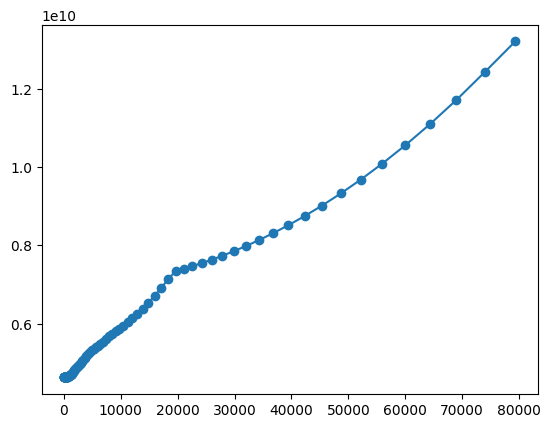

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LassoCV
lasso_reg = LassoCV(cv = 5)
lasso_reg.fit(x_train_prepared, y_train)

plt.plot(lasso_reg.alphas_, lasso_reg.mse_path_.mean(axis = 1), marker = 'o')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33973900658459.17, tolerance: 19771795264.439693
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did

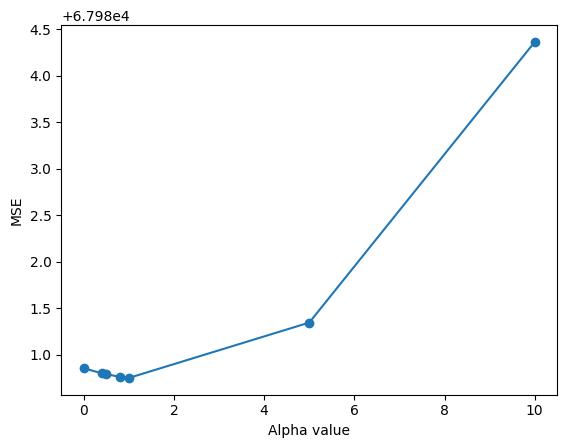

In [26]:
lasso_reg2 = LassoCV(cv = 10, alphas=[0, 0.4, 0.5, 0.8, 1, 5, 10])
lasso_reg2.fit(x_train_prepared, y_train)

plt.plot(lasso_reg2.alphas_, np.sqrt(lasso_reg2.mse_path_.mean(axis = 1)), marker = 'o')
plt.xlabel('Alpha value')
plt.ylabel('MSE')
plt.show()

In [32]:
#register the lasso error
#calculate mean,
lasso_best_model_error = np.sqrt(np.mean(lasso_reg2.mse_path_[np.argmin(lasso_reg2.mse_path_.mean(axis = 1))]))

In [40]:
var_coef = []
for variable, coef in zip(x_train_prepared.columns, lasso_reg2.coef_):
  var_coef.append({variable : coef})

var_coef = np.array(var_coef)
print(var_coef)

[{'longitude': -53755.24400962371} {'latitude': -53476.1376982358}
 {'housing_median_age': 13500.485933903092}
 {'total_rooms': 3625.648205440464} {'total_bedrooms': 23221.554283870788}
 {'population': -43407.48952087603} {'households': 21756.331504373746}
 {'median_income': 79677.63767488529}
 {'bedrooms_per_room': 13427.653586172577}
 {'ocean_proximity_<1H OCEAN': 5439.502094999828}
 {'ocean_proximity_INLAND': -29895.04030046462}
 {'ocean_proximity_ISLAND': 151223.57043282432}
 {'ocean_proximity_NEAR BAY': 871.2955745440709}
 {'ocean_proximity_NEAR OCEAN': 9764.489519153078}]


The coefficient reinforce the findings of exploratory analysis. </br>
The Inland category had the lowest median house price which is shown in the coefficient list. Population had a negative association with median house price and median income was considered an important predictor. All of these is reflected in the sign and magnitude of the coefficients given by Lasso model.

In [ ]:
#SVM regressors
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

svm_linear = LinearSVR()
svm_linear.fit(x_train_prepared, y_train)

svm_linear_errors = np.sqrt(-1 * cross_val_score(svm_linear, x_train_prepared, y_train,
                             scoring = 'neg_mean_squared_error', cv = 5))

print(svm_linear_errors, '\n')
svm_linear_errors.mean()


[221040.62952196 220729.63927756 218594.68598487 221325.64488337
 224268.3799117 ] 



221191.79591589226

In [ ]:
from sklearn.base import BaseEstimator

class DummyEstimator(BaseEstimator):
  def fit(self) : pass
  def score(self) : pass

pipe = Pipeline([('reg', DummyEstimator())]) #placeholder

svm_search_space = [
    {'reg' : [SVR(kernel = 'rbf')],
     'reg__gamma' : [0.1, 1, 5, 10]},

    {'reg' : [SVR(kernel = 'poly')],
     'reg__degree' : [2, 4],
     'reg__C' : [0.1, 5, 10, 50]}
]

svm_grid_search = GridSearchCV(pipe, svm_search_space, scoring = 'neg_mean_squared_error',
                               cv= 5)
svm_grid_search.fit(x_train_prepared, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', DummyEstimator())]),
             param_grid=[{'reg': [SVR()], 'reg__gamma': [0.1, 1, 5, 10]},
                         {'reg': [SVR(C=50, degree=2, kernel='poly')],
                          'reg__C': [0.1, 5, 10, 50], 'reg__degree': [2, 4]}],
             scoring='neg_mean_squared_error')

In [ ]:
print(svm_grid_search.best_estimator_, '\n')
print(np.sqrt(-1 *svm_grid_search.best_score_), '\n')


Pipeline(steps=[('reg', SVR(C=50, degree=2, kernel='poly'))]) 

110725.10257173516 



In [24]:
def DisplayCVRes(grid_search):
  try:
    cv_res = grid_search.cv_results_
  except AttributeError:
    return 'Probably not a sklearn\'s grid search object '

  score_list = []
  for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    score_list.append((params, np.sqrt(-1 *mean_score)))
  score_list.sort(key = lambda x : x[1])
  return score_list[0:5]

#DisplayCVRes(svm_grid_search)

In [50]:
#try random forests:
#with bagging, random subspaces
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_grid = [
    dict(n_estimators = [300, 500], min_samples_split = [10, 20],
         max_samples = [1000, 500], bootstrap = [True]),
    dict(n_estimators = [300, 500], min_samples_split = [10, 20],
        max_features = [0.5]),
    dict(n_estimators = [500, 650], min_samples_split = [10, 15],
         bootstrap = [False], max_features = [1])
]

rf_grid_search = GridSearchCV(rf_reg, rf_grid, scoring = 'neg_mean_squared_error',
                              cv = 5)

rf_grid_search.fit(x_train_prepared, y_train)
DisplayCVRes(rf_grid_search)

[({'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 500},
  49468.46520444356),
 ({'max_features': 0.5, 'min_samples_split': 10, 'n_estimators': 300},
  49515.154976104444),
 ({'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 500},
  50503.41277279415),
 ({'max_features': 0.5, 'min_samples_split': 20, 'n_estimators': 300},
  50640.77982434583),
 ({'bootstrap': False,
   'max_features': 1,
   'min_samples_split': 10,
   'n_estimators': 500},
  53596.507235899146)]

In [52]:
#compare xgboost and lightgbm
import xgboost as xgb
from sklearn.base import BaseEstimator

class DummyEstimator(BaseEstimator):
  def fit(self):pass
  def score(self):pass

pipe = Pipeline([('reg', DummyEstimator())])

xgb_reg_grid = [
    dict(reg = [xgb.XGBRegressor(booster = 'gbtree')],
         reg__n_estimators = [100, 200],
         reg__learning_rate = [0.2, 0.4],
         reg__subsample = [0.8, 1],
         reg__colsample_bytree = [0.8, 1],
         reg__colsample_bynode = [1])
]

xgb_reg_grid_search = GridSearchCV(pipe, xgb_reg_grid,
                                   cv = 5, scoring = 'neg_mean_squared_error')
xgb_reg_grid_search.fit(x_train_prepared.values, y_train)

DisplayCVRes(xgb_reg_grid_search)

[({'reg': XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
                colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.8,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=200, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
   'reg__colsample_bynode': 1,
   'reg__colsample_bytree': 0.8,
   'reg__learning_rate': 0.2,
   'reg__n_estimators': 200,
   'reg__subsample': 1},
  46339.84032770636),
 ({'reg': XGBRegressor(base_score=None, booster='

In [53]:
#lightgbm
import lightgbm as lgbm

lgbm_grid = [
    dict(reg = [lgbm.LGBMRegressor(verbosity = -1)],
         reg__n_estimators = [350, 500],
         reg__learning_rate = [0.1, 0.07],
         reg__min_data_in_leaf = [40, 50, 60],
         reg__subsample = [0.75],
         reg__colsample_bytree = [0.8, 0.5],
         reg__colsample_bynode = [0.5, 0.8])
]

lgbm_grid_search = GridSearchCV(pipe, lgbm_grid, scoring = 'neg_mean_squared_error',
                                cv= 5)
lgbm_grid_search.fit(x_train_prepared, y_train)

DisplayCVRes(lgbm_grid_search)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min

[({'reg': LGBMRegressor(colsample_bynode=0.8, colsample_bytree=0.8, learning_rate=0.07,
                 min_data_in_leaf=60, n_estimators=500, subsample=0.75,
                 verbosity=-1),
   'reg__colsample_bynode': 0.8,
   'reg__colsample_bytree': 0.8,
   'reg__learning_rate': 0.07,
   'reg__min_data_in_leaf': 60,
   'reg__n_estimators': 500,
   'reg__subsample': 0.75},
  45222.263304470165),
 ({'reg': LGBMRegressor(colsample_bynode=0.8, colsample_bytree=0.8, learning_rate=0.07,
                 min_data_in_leaf=60, n_estimators=500, subsample=0.75,
                 verbosity=-1),
   'reg__colsample_bynode': 0.8,
   'reg__colsample_bytree': 0.8,
   'reg__learning_rate': 0.07,
   'reg__min_data_in_leaf': 40,
   'reg__n_estimators': 500,
   'reg__subsample': 0.75},
  45245.904834015666),
 ({'reg': LGBMRegressor(colsample_bynode=0.8, colsample_bytree=0.8, learning_rate=0.07,
                 min_data_in_leaf=60, n_estimators=500, subsample=0.75,
                 verbosity=-1),
   're

In [58]:
lgbm_grid2 = [
    dict(reg = [lgbm.LGBMRegressor()],
         reg__n_estimators = [600, 750],
         reg__learning_rate = [0.05, 0.02],
         reg__subsample = [0.75],
         reg__min_data_in_leaf = [60, 80],
         reg__colsample_bytree = [0.8, 1],
         reg__colsample_bynode = [0.8, 1])
]

lgbm_grid_search2 = GridSearchCV(pipe, lgbm_grid2, cv = 5,
                                 scoring = 'neg_mean_squared_error')

lgbm_grid_search2.fit(x_train_prepared, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', DummyEstimator())]),
             param_grid=[{'reg': [LGBMRegressor(colsample_bynode=1,
                                                colsample_bytree=0.8,
                                                learning_rate=0.05,
                                                min_data_in_leaf=60,
                                                n_estimators=750,
                                                subsample=0.75)],
                          'reg__colsample_bynode': [0.8, 1],
                          'reg__colsample_bytree': [0.8, 1],
                          'reg__learning_rate': [0.05, 0.02],
                          'reg__min_data_in_leaf': [60, 80],
                          'reg__n_estimators': [600, 750],
                          'reg__subsample': [0.75]}],
             scoring='neg_mean_squared_error')

In [59]:
DisplayCVRes(lgbm_grid_search2)

[({'reg': LGBMRegressor(colsample_bynode=1, colsample_bytree=0.8, learning_rate=0.05,
                 min_data_in_leaf=60, n_estimators=750, subsample=0.75),
   'reg__colsample_bynode': 1,
   'reg__colsample_bytree': 0.8,
   'reg__learning_rate': 0.05,
   'reg__min_data_in_leaf': 60,
   'reg__n_estimators': 750,
   'reg__subsample': 0.75},
  44948.1345164944),
 ({'reg': LGBMRegressor(colsample_bynode=1, colsample_bytree=0.8, learning_rate=0.05,
                 min_data_in_leaf=60, n_estimators=750, subsample=0.75),
   'reg__colsample_bynode': 0.8,
   'reg__colsample_bytree': 1,
   'reg__learning_rate': 0.05,
   'reg__min_data_in_leaf': 60,
   'reg__n_estimators': 750,
   'reg__subsample': 0.75},
  45014.581944176636),
 ({'reg': LGBMRegressor(colsample_bynode=1, colsample_bytree=0.8, learning_rate=0.05,
                 min_data_in_leaf=60, n_estimators=750, subsample=0.75),
   'reg__colsample_bynode': 1,
   'reg__colsample_bytree': 0.8,
   'reg__learning_rate': 0.05,
   'reg__min_dat

There is a slight increase in rmse using 250 extra boosters. To avoid overfitting, it seems that model from the first grid search is likely to generalize well to unseen data.

Nevertheless, I will be using something called a stacking algorithm (different from the ones in DSA classes) to train a 'meta-learner' from these individual strong learner namely, XGBoost, Light GBM, and Random Forest models.

Idea behind stacking:</br>
To boost the performance of an ensemble of several strong learners using a 'meta learner'.</br>
Predict the value of the training set itself using the trained models. This becomes the training set for the meta-learner</br>
Split the training set made up of predictions into train and validation set.</br>
Train the meta learner on the training. </br>
Assess the performance of the meta-learner using validation set. </br>
On the test set of the main dataset, predict the value using the individual learner. Use the meta-learner to enhance the predictions.



In [60]:
demo_model = lgbm_grid_search.best_estimator_['reg']
demo_model2 = xgb_reg_grid_search.best_estimator_['reg']
demo_model3 = rf_grid_search.best_estimator_

stack_df = pd.DataFrame(dict(lgbm_preds = demo_model.predict(x_train_prepared),
                  xgb_preds = demo_model2.predict(x_train_prepared),
                  rf_preds = demo_model3.predict(x_train_prepared),
                  true_values = y_train))
stack_df.head()

,lgbm_preds,xgb_preds,rf_preds,true_values
3061,63042.368727,61598.722656,68171.928487,59800.0
4123,305818.327318,285049.281250,320751.652476,258100.0
7979,153024.138642,151354.593750,169242.622068,162800.0
20383,224473.690404,238790.671875,233515.925925,228800.0
373,103223.406643,100926.507812,114760.909749,111100.0


In [61]:
#split the stack_df for a hold-out set
label_array = np.where(np.mean(stack_df.iloc[:, :3], axis = 1) >= stack_df['true_values'], 2, 1)

stack_df['fit_label'] = label_array
print(stack_df.head(), '\n')

stack_df_train, stack_df_valid = train_test_split(stack_df, test_size = 0.2, stratify = stack_df['fit_label'])

for dfs in (stack_df_train, stack_df_valid):
  dfs.drop(['fit_label'], inplace = True, axis = 1)

stack_y_train, stack_y_valid = stack_df_train.pop('true_values'), stack_df_valid.pop('true_values')


          lgbm_preds      xgb_preds       rf_preds  true_values  fit_label
3061    63042.368727   61598.722656   68171.928487      59800.0          2
4123   305818.327318  285049.281250  320751.652476     258100.0          2
7979   153024.138642  151354.593750  169242.622068     162800.0          1
20383  224473.690404  238790.671875  233515.925925     228800.0          2
373    103223.406643  100926.507812  114760.909749     111100.0          1 



In [62]:
#roll out a dnn,
#use BN
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [88]:
meta_learner = keras.models.Sequential([
    keras.layers.Input(shape = stack_df_train.shape[1]),
    keras.layers.Dense(500, activation = keras.layers.LeakyReLU(), kernel_initializer= 'he_normal'),
    keras.layers.Dense(200, activation = keras.layers.LeakyReLU(), kernel_initializer = 'he_normal'),
    keras.layers.Dense(200, activation = keras.layers.LeakyReLU(), kernel_initializer = 'he_normal'),
    keras.layers.Dropout(rate = 0.15),
    keras.layers.Dense(1)
])

meta_learner.compile(loss = 'mse', optimizer = 'adam', metrics = keras.metrics.RootMeanSquaredError(name= 'rmse'))
meta_learner_history = meta_learner.fit(stack_df_train, stack_y_train, epochs = 60,
          callbacks = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True), validation_split = 0.2)

#the above nn model uses mean squared error loss function to optimize using ADAM optimizer
#training set is split into two sets with validation set proportion being 20%

Epoch 1/60
331/331 [==============================] - 3s 6ms/step - loss: 12279702528.0000 - rmse: 110813.8203 - val_loss: 547793152.0000 - val_rmse: 23404.9805
Epoch 2/60
331/331 [==============================] - 2s 5ms/step - loss: 939190592.0000 - rmse: 30646.2168 - val_loss: 547682048.0000 - val_rmse: 23402.6074
Epoch 3/60
331/331 [==============================] - 2s 5ms/step - loss: 841638208.0000 - rmse: 29011.0020 - val_loss: 963776512.0000 - val_rmse: 31044.7500
Epoch 4/60
331/331 [==============================] - 2s 5ms/step - loss: 830771392.0000 - rmse: 28823.1055 - val_loss: 1440902912.0000 - val_rmse: 37959.2266
Epoch 5/60
331/331 [==============================] - 2s 6ms/step - loss: 913077888.0000 - rmse: 30217.1777 - val_loss: 839198464.0000 - val_rmse: 28968.9219
Epoch 6/60
331/331 [==============================] - 3s 9ms/step - loss: 867917376.0000 - rmse: 29460.4375 - val_loss: 711336896.0000 - val_rmse: 26670.9004
Epoch 7/60
331/331 [============================

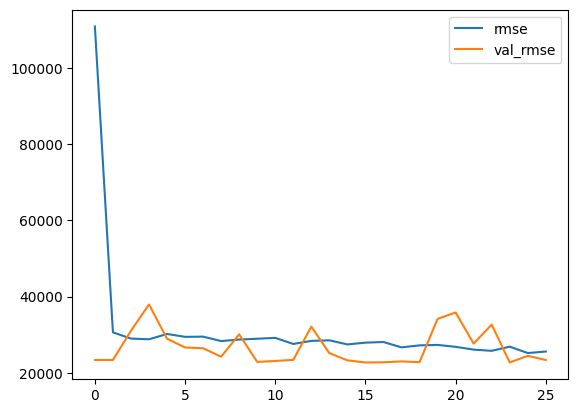

In [89]:
pd.DataFrame(meta_learner_history.history).loc[:, ['rmse', 'val_rmse']].plot()
plt.show()

In [90]:
meta_learner.evaluate(stack_df_valid, stack_y_valid)

104/104 [==============================] - 0s 3ms/step - loss: 520660896.0000 - rmse: 22817.9941


[520660896.0, 22817.994140625]

<---W.I.P--->